C:\Users\naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 43ms/step - accuracy: 0.8784 - loss: 0.3952 - val_accuracy: 0.9836 - val_loss: 0.0502
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9837 - loss: 0.0551 - val_accuracy: 0.9861 - val_loss: 0.0401
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9882 - loss: 0.0378 - val_accuracy: 0.9912 - val_loss: 0.0287
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9925 - loss: 0.0253 - val_accuracy: 0.9896 - val_loss: 0.0309
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9909 - val_loss: 0.0307
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9900 - val_loss: 0.0340
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9898 - val_loss: 0.0315
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9966 - loss: 0.0099 - 

C:\Users\naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8843 - loss: 0.4084 - val_accuracy: 0.9670 - val_loss: 0.1063
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9705 - loss: 0.0952 - val_accuracy: 0.9727 - val_loss: 0.0859
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9830 - loss: 0.0556 - val_accuracy: 0.9750 - val_loss: 0.0829
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9861 - loss: 0.0439 - val_accuracy: 0.9787 - val_loss: 0.0731
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9899 - loss: 0.0322 - val_accuracy: 0.9793 - val_loss: 0.0762
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0241 - val_accuracy: 0.9773 - val_loss: 0.0810
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9932 - loss: 0.0209 - val_accuracy: 0.9814 - val_loss: 0.0665
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9946 - loss: 0.0161 - val_accuracy: 

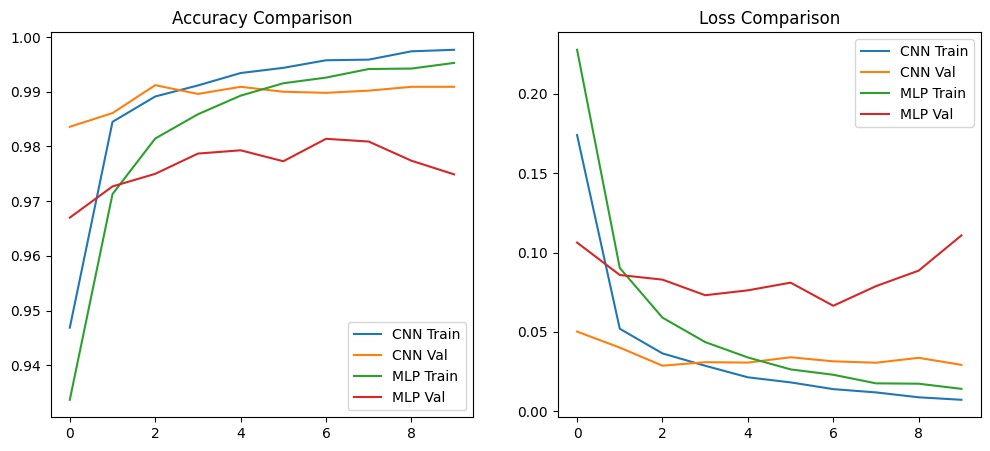

CNN Accuracy: 0.9908999800682068
MLP Accuracy: 0.9749000072479248


In [1]:
# ---------------------------------------------------------
# ASSIGNMENT 5: Build a CNN for Image Classification
#
# • Build a simple CNN (2 conv layers + FC) using MNIST.
# • Compare performance with a simple MLP.
# • Plot accuracy and loss curves.
# ---------------------------------------------------------

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# LOAD MNIST DATA
# -----------------------------
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# -----------------------------
# PREPARE DATA FOR CNN
# CNN needs channel dimension → (28,28,1)
# -----------------------------
x_train_cnn = np.expand_dims(x_train, axis=-1)
x_test_cnn = np.expand_dims(x_test, axis=-1)

# -----------------------------
# BUILD CNN MODEL
# -----------------------------
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# TRAIN CNN
# -----------------------------
history_cnn = cnn_model.fit(
    x_train_cnn, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)

# -----------------------------
# BUILD MLP MODEL (LIKE ASSIGNMENT 2)
# -----------------------------
x_train_mlp = x_train.reshape(-1, 784)
x_test_mlp = x_test.reshape(-1, 784)

mlp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# TRAIN MLP
# -----------------------------
history_mlp = mlp_model.fit(
    x_train_mlp, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_mlp, y_test),
    verbose=1
)

# -----------------------------
# PLOT ACCURACY & LOSS
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val')
plt.plot(history_mlp.history['accuracy'], label='MLP Train')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Val')
plt.title("Accuracy Comparison")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='CNN Train')
plt.plot(history_cnn.history['val_loss'], label='CNN Val')
plt.plot(history_mlp.history['loss'], label='MLP Train')
plt.plot(history_mlp.history['val_loss'], label='MLP Val')
plt.title("Loss Comparison")
plt.legend()

plt.show()

# -----------------------------
# FINAL ACCURACY REPORT
# -----------------------------
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
mlp_loss, mlp_acc = mlp_model.evaluate(x_test_mlp, y_test, verbose=0)

print("CNN Accuracy:", cnn_acc)
print("MLP Accuracy:", mlp_acc)
